In [74]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [75]:
def oracle(numbers, goal, wires, aux_wires):
    """Oracle to mark states where the sum of the selected numbers is equal to the goal."""
    
    def add_k_fourier(k, wires):
        for j in range(len(wires)):
            qml.RZ(k * np.pi / (2**j), wires=wires[j])

    def compute_sum_in_fourier_basis():
        qml.QFT(wires=aux_wires)
        for idx, wire in enumerate(wires):
            qml.ctrl(add_k_fourier, control=wire)(numbers[idx], wires=aux_wires)
        qml.adjoint(qml.QFT)(wires=aux_wires)
        
    compute_sum_in_fourier_basis()

    qml.FlipSign(goal, aux_wires) ## check
    
    qml.adjoint(compute_sum_in_fourier_basis)()

def grover_circuit(numbers, goal, rep):
    num_wires = len(numbers)
    aux_wires = [num_wires + i for i in range(num_wires)]
    dev = qml.device("default.qubit", wires=num_wires + num_wires)
    
    @qml.qnode(dev)
    def circuit():
        # Step 1: Apply Hadamard gates to all variable wires
        for wire in range(num_wires):
            qml.Hadamard(wires=wire)
        
        for _ in range(rep):
            # Step 2: Apply the oracle
            oracle(numbers, goal, range(num_wires), aux_wires)
            
            # Step 3: Apply Grover's diffusion operator
            qml.GroverOperator(wires=range(num_wires))
        
        return qml.probs(wires=range(num_wires))
    
    return circuit()


<BarContainer object of 16 artists>

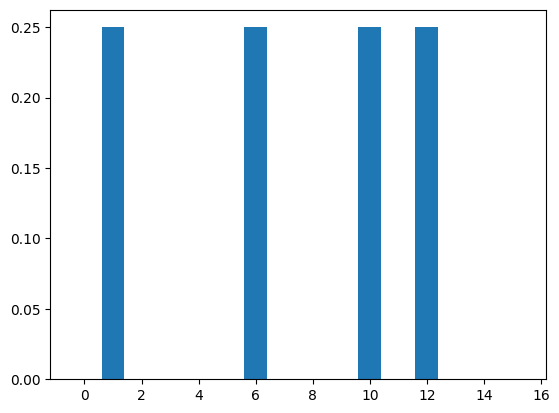

In [110]:
numbers = [4, 8, 6, 3, 12, 15]
numbers = [4, 8, 6, 3, 12, 15]
numbers = [1, 1, 1, 2]
goal = 35
goal = 15
goal = 2
result = grover_circuit(numbers, goal, rep=1)

plt.bar( range(len(result)),  result)

In [111]:
max_pos = np.argmax(result) ## solution in position

In [112]:
maxiter = 20
sol_probs = [grover_circuit(numbers, goal, rep=i)[max_pos] for i in range (0,maxiter)]

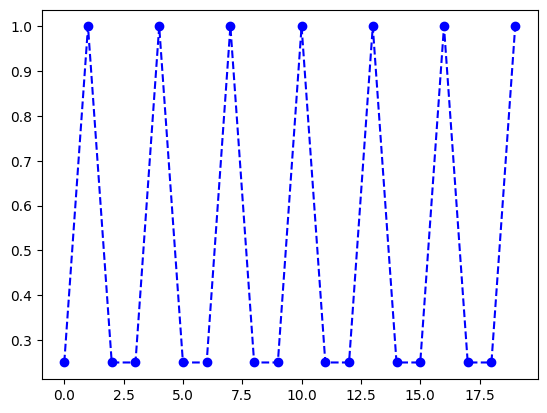

In [119]:
import seaborn as sns
num_of_sol = 4
plt.plot(range(0,maxiter), (np.array(sol_probs) * num_of_sol), marker='o', linestyle='--', color='b', label='solution probability')

In [118]:
sol_probs[0] * 4 

tensor(0.25, requires_grad=True)

In [49]:
## now get only one shot, 
#   shots=1 
#   method to return sample

def grover_circuit(numbers, goal):
    num_wires = len(numbers)
    aux_wires = [num_wires + i for i in range(num_wires)]
    dev = qml.device("default.qubit", wires=num_wires + num_wires, shots=1)
    
    @qml.qnode(dev)
    def circuit():
        # Step 1: Apply Hadamard gates to all variable wires
        for wire in range(num_wires):
            qml.Hadamard(wires=wire)
        
        for _ in range(1):
            # Step 2: Apply the oracle
            oracle(numbers, goal, range(num_wires), aux_wires)
            
            # Step 3: Apply Grover's diffusion operator
            qml.GroverOperator(wires=range(num_wires))
        
        return qml.sample(wires=range(num_wires))
    
    return circuit()


In [5]:
result = grover_circuit(numbers, goal)

In [6]:
np.array(numbers)[result == 1].numpy()

array([ 4,  8, 15])